# Strong MPI scalability

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data 
df = pd.read_csv('../data/smpi_timings240000000.csv')
df.head()

,Size,Cores,Time
0,240000000,1,79.726683
1,240000000,1,63.577357
2,240000000,1,63.504468
3,240000000,1,63.449714
4,240000000,1,69.663567


In [4]:
# Calculate the mean time for each value of the 'Threads' column
mean_times = df.groupby('Cores')['Time'].mean().reset_index()

print(mean_times)
type(mean_times)

    Cores       Time
0       1  67.984358
1       2  24.627419
2       3  28.421640
3       4  21.107614
4       5  30.017267
..    ...        ...
59     60   6.674930
60     61   6.960528
61     62   6.702744
62     63   6.718169
63     64   6.956104

[64 rows x 2 columns]


pandas.core.frame.DataFrame

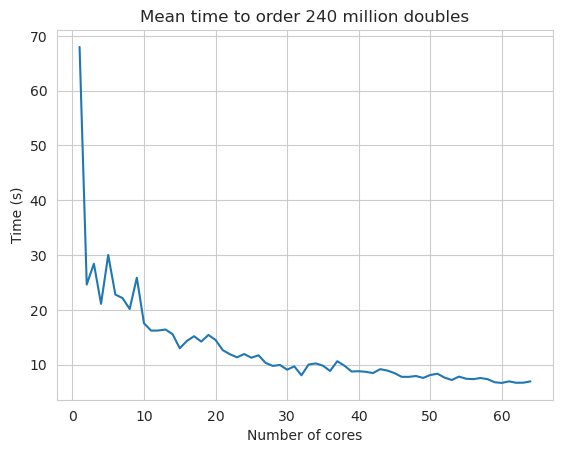

In [5]:
# Plot the mean timings with seaborn

sns.set_style("whitegrid")
ax = sns.lineplot(x="Cores", y="Time", data=mean_times)
ax.set_title('Mean time to order 240 million doubles')
ax.set_xlabel('Number of cores')
ax.set_ylabel('Time (s)')
plt.show()

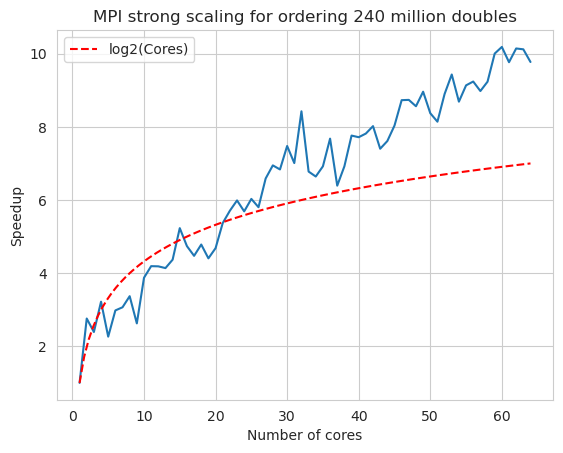

In [6]:
# Plot speedup

mean_times['Speedup'] = mean_times['Time'][0] / mean_times['Time']
ax = sns.lineplot(x="Cores", y="Speedup", data=mean_times)

# Add a log_2 plot to the same graph
x = np.linspace(1, mean_times['Cores'].max(), 100)
y = np.log2(x) + np.ones(100)

plt.plot(x, y, label='log2(Cores)', linestyle='--', color='red')


ax.set_title('MPI strong scaling for ordering 240 million doubles')
ax.set_xlabel('Number of cores')
ax.set_ylabel('Speedup')
plt.legend()
plt.show()

In [8]:
df1 = pd.read_csv('../data/smpi2_timings240000000.csv')
df1.head()

,Size,Cores,Time
0,240000000,65,6.315376
1,240000000,65,7.348485
2,240000000,65,6.828387
3,240000000,65,6.422926
4,240000000,65,6.230549


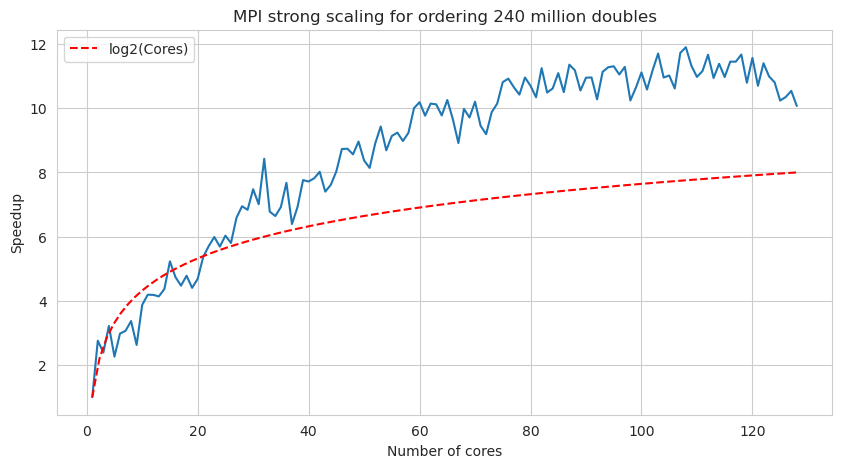

In [16]:
total_scaling = pd.concat([df, df1])

mean_total_scaling = total_scaling.groupby('Cores')['Time'].mean().reset_index()
mean_total_scaling['Speedup'] = mean_total_scaling['Time'][0] / mean_total_scaling['Time']

ax = sns.lineplot(x="Cores", y="Speedup", data=mean_total_scaling)

# Add a log_2 plot to the same graph
x = np.linspace(1, mean_total_scaling['Cores'].max(), 100)
y = np.log2(x) + np.ones(100)

plt.plot(x, y, label='log2(Cores)', linestyle='--', color='red')


ax.set_title('MPI strong scaling for ordering 240 million doubles')
ax.set_xlabel('Number of cores')
ax.set_ylabel('Speedup')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()
